# Introdução à Machine Learning: Titanic - Machine Learning from Disaster

Bem-vindo ao nosso notebook! Neste exemplo, vamos explorar uma das competições mais clássicas do Kaggle: **Titanic - Machine Learning from Disaster**. Essa competição introdutória é ideal para aprender os fundamentos de **ciência de dados** e **aprendizado de máquina**, aplicando técnicas de **pré-processamento, análise exploratória e modelagem preditiva**.

## Sobre o dataset

O desafio é prever quais passageiros sobreviveram ao naufrágio do Titanic com base em informações como idade, gênero, classe da cabine e outros fatores. Utilizaremos esse conjunto de dados para treinar modelos de **Machine Learning** e avaliar seu desempenho.
}
## Objetivos do Notebook  

1. **Explorar os dados** para entender suas características e padrões.  
2. **Realizar pré-processamento** para tratar valores ausentes e variáveis categóricas.  
3. **Criar modelos preditivos** para prever a sobrevivência dos passageiros.  
4. **Avaliar a performance dos modelos** utilizando métricas adequadas.  

Esse notebook serve como um ponto de partida para quem deseja aprender e praticar **ciência de dados aplicada a machine learning**. Vamos começar!
amos começar!
mos começar! 🚀


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

In [9]:
#Baixando o dataset
!gdown 1qT5OdmoWy1tkIAbvXRx-gjVKA_GUNfO0
df = pd.read_csv('titanic_train.csv')

Downloading...
From: https://drive.google.com/uc?id=1qT5OdmoWy1tkIAbvXRx-gjVKA_GUNfO0
To: /content/titanic_train.csv
100% 61.2k/61.2k [00:00<00:00, 74.3MB/s]


### Análisando os dados

Para construir um bom modelo de Machine Learning, é fundamental compreender os dados. Uma análise cuidadosa permite identificar e tratar valores faltantes, selecionar as variáveis mais relevantes para o modelo e garantir que os dados estejam devidamente preparados para a etapa de modelagem. Essa etapa é essencial para melhorar o desempenho e a interpretabilidade do modelo.

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# Verificando Valores nulos
for c in df.columns:
    print(f'{c}: {df[c].isnull().sum()}')

PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 687
Embarked: 2


In [13]:
# Verificando a distribuição da variável Target
df.Survived.value_counts()

,count
Survived,
0,549
1,342


### Limpeza dos Dados


A etapa de limpeza dos dados é essencial antes de aplicar qualquer modelo de aprendizado de máquina. Durante essa fase, é importante garantir que os dados estejam bem estruturados, sem inconsistências ou valores faltantes. Uma boa limpeza de dados ajuda a garantir que o modelo seja capaz de aprender corretamente e realizar as previsões com precisão. Além disso, ela assegura que os dados estejam prontos para serem usados de maneira eficiente no treinamento e na validação do modelo.



#### Pegando o titulo e nome de família
Os nomes tem o seguinte padrão:
sobrenome, título. nome

Vamos usar isso para extrair informações relevantes

In [14]:
df.Name.head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


In [15]:
# Pegando o título de cada passageiro
df['Title'] = df['Name'].str.split(',').str[1].str.split().str[0]
df.Title.value_counts()

,count
Title,
Mr.,517
Miss.,182
Mrs.,125
Master.,40
Dr.,7
Rev.,6
Col.,2
Mlle.,2
Major.,2


In [16]:
# Definindo títulos comuns
titles = ['Mr.', 'Miss.', 'Mrs.', 'Master.']
# Substituindo títulos raros por "Rare"
df.loc[~df['Title'].isin(titles), 'Title'] = 'Rare'
# Transformando em valor numerico
df['Title'].replace({'Mr.':1, 'Miss.':4, 'Mrs.':5, 'Master.':3, 'Rare':2}, inplace=True)

<ipython-input-16-405f8744c5a3>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Title'].replace({'Mr.':1, 'Miss.':4, 'Mrs.':5, 'Master.':3, 'Rare':2}, inplace=True)
<ipython-input-16-405f8744c5a3>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Title'].replace({'Mr.':1, 'Miss.':4, 'Mrs.':5

In [17]:
df['Family'] = df['Name'].str.split(',').str[0]
# Contar as ocorrências de cada nome de família
df['Family'].value_counts()

,count
Family,
Andersson,9
Sage,7
Skoog,6
Panula,6
Carter,6
...,...
Nysveen,1
Young,1
Slayter,1


In [18]:
family_counts = df['Family'].value_counts()
# Criar a variável 'isAlone' que será True se a família aparecer apenas uma vez, False caso contrário
df['isAlone'] = (df['Family'].map(family_counts) <= 1).astype('int')

<Axes: xlabel='isAlone', ylabel='count'>

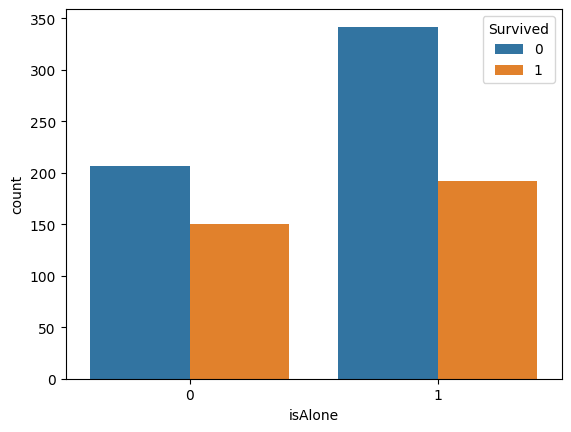

In [19]:
sns.countplot(data=df, x=df.isAlone, hue=df.Survived)

#### Lidando com variáveis categóricas

In [20]:
# Selecionando as colunas que vão ser utilizadas
drop_columns = ['Name', 'PassengerId', 'Cabin', 'Ticket', 'Family']
df = df.drop(drop_columns, axis='columns').copy()  # Fazendo uma cópia para evitar alteração no original
# Lidando com variáveis categóricas
le = preprocessing.LabelEncoder()
cat_columns = ['Embarked', 'Sex']
for c in cat_columns:
    df[c] = le.fit_transform(df[c])

#### Lidando com dados faltantes

In [21]:
# Lidando com valores faltantes
df.Age = df['Age'].fillna(df['Age'].median())
df.Fare = df['Fare'].fillna(df['Fare'].median())

In [22]:
for c in df.columns:
    print(f'{c}: {df[c].isnull().sum()}')

Survived: 0
Pclass: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Fare: 0
Embarked: 0
Title: 0
isAlone: 0


### Analisando os dados

<Axes: xlabel='Sex', ylabel='count'>

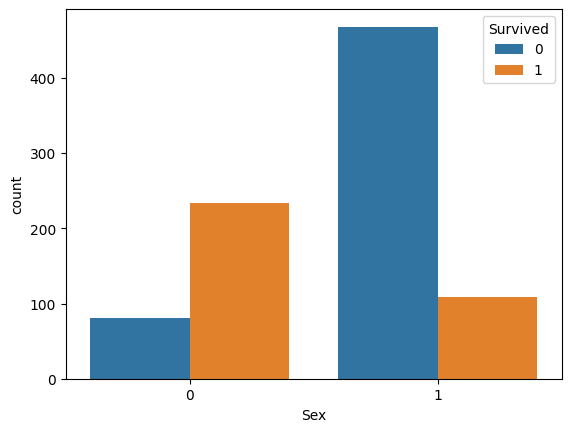

In [23]:
# Analisando sexo
sns.countplot(data=df, x=df.Sex, hue=df.Survived)

### Separando os dados e balanceando

Agora, vamos dividir o conjunto de dados de treinamento em X e Y. Onde X serão as variáveis preditoras, ou seja, as características dos passageiros que utilizaremos para fazer as previsões, e Y será a variável alvo, indicando se o passageiro morreu ou sobreviveu.

Além disso, é importante balancear o conjunto de dados, pois, como vimos na análise anterior, há mais passageiros que morreram do que os que sobreviveram. Esse desequilíbrio pode fazer com que o modelo aprenda de forma tendenciosa, favorecendo a previsão de que o passageiro tenha morrido, mesmo quando ele tenha sobrevivido. Portanto, o balanceamento ajudará a ajustar o modelo e evitar essa distorção.

In [24]:
from sklearn.model_selection import train_test_split
# Separando a variável Target das variáveis de prediçã
X = df.drop(['Survived'], axis='columns')
y = df.Survived

# Separando em conjunto de treino e conjunto de validação
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
# Balanceando os dados com Over-sampling
X_train, y_train = smote.fit_resample(X_train, y_train)

### Treinando Modelo e análisando a performance

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Criando modelo e treinando
knn = KNeighborsClassifier().fit(X_train, y_train)

In [27]:
pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(pred, y_test)

0.7623318385650224